In [67]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential, layers, models
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow.keras.callbacks import EarlyStopping
import h5py as h5
import matplotlib.pyplot as plt

In [86]:
y_df = pd.read_csv("../data/y_dataframe.csv")

/tmp/ipykernel_492/4167803891.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  y_df = pd.read_csv("../data/y_dataframe.csv")


In [87]:
y_train = y_df.iloc[:8859, 1:].to_numpy()

In [92]:
y_df

,1950s,1970,1971,2009,4-way,abandon,about,above,abraham,abstract,...,yogurt,york,you,young,younger,youth,zebra,zip,zombie,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
y_df.drop(columns = ["Unnamed: 0"], inplace = True)

In [82]:
X_train = np.load("../data/nsd_train_fmriavg_nsdgeneral_sub1.npy")

In [83]:
from sklearn.preprocessing import RobustScaler

In [84]:
scaler = RobustScaler()

In [74]:
X_scaled = scaler.fit_transform(X_train)

In [75]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [93]:
y_train.shape

(8859, 2637)

In [94]:
model = Sequential([layers.Dense(100, input_shape = (15724,), activation = "relu"),
                  layers.Dense(100, activation = "relu"),
                    layers.Dropout(0.5),
                  layers.Dense(200, activation = "relu"),
                    layers.Dropout(0.5),
                  layers.Dense(500, activation = "relu"),
                    layers.Dropout(0.5),
                    layers.Dense(500, activation = "relu"),
                    layers.Dropout(0.5),
                    layers.Dense(1000, activation = "relu"),
                    layers.Dropout(0.5),
                    layers.Dense(2000, activation = "relu"),
                  layers.Dense(2637, activation = "sigmoid")])

In [95]:
model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [96]:
model.fit(X_scaled, y_train, validation_split=0.1, batch_size = 32, epochs = 30)

Epoch 1/30
250/250 [==============================] - 17s 60ms/step - loss: 0.0198 - val_loss: 0.1020
Epoch 2/30
250/250 [==============================] - 15s 57ms/step - loss: 0.0099 - val_loss: 0.0180
Epoch 3/30
 75/250 [========>.....................] - ETA: 8s - loss: 0.0093

KeyboardInterrupt: 

In [28]:
X_test = np.load("../data/nsd_test_fmriavg_nsdgeneral_sub1.npy")

In [29]:
X_test_scaled = scaler.transform(X_test)

In [30]:
test_answer = model.predict(X_test_scaled[70].reshape(1,-1))

1/1 [==============================] - 0s 63ms/step


In [31]:
labels = y_df.columns

In [32]:
labels

Index(['1950s', '1970', '1971', '2009', '4-way', 'abandon', 'about', 'above',
       'abraham', 'abstract',
       ...
       'yogurt', 'york', 'you', 'young', 'younger', 'youth', 'zebra', 'zip',
       'zombie', 'zoo'],
      dtype='object', length=2637)

In [33]:
# len(np.argpartition(test_answer[0],-4))

In [34]:
test_answer[test_answer>0.4]

array([], dtype=float32)

In [35]:
test_answer_idxs = np.argpartition(test_answer[0],-4)[-4:]

In [36]:
labels[test_answer_idxs]

Index(['wakeboarding', 'penn', 'male', 'stance'], dtype='object')

In [42]:
images_file = h5.File("../data/selected_test_images.hdf5", "r")
stim_list_test=np.load('../data/nsd_test_stim_list1.npy')
stim_list_train=np.load('../data/subj01_nsd_train_stim_list1.npy')
# train_caps=np.load('drive/MyDrive/data/nsd_train_cap_sub1.npy')
test_caps=np.load('../data/nsd_test_cap_sub1.npy')
X_test_dataframe = pd.read_csv('../data/df_test.csv')
df_test_idx_caps=X_test_dataframe[['Image_index', 'test_caps_processed']]

In [47]:
pwd

'/home/nik/code/nik-bond/MindSee/notebooks'

1/1 [==============================] - 0s 15ms/step


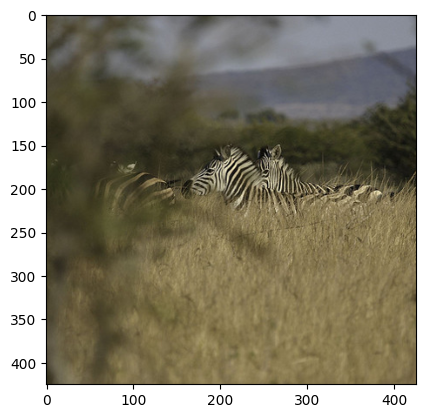

Original captions ['A large group of zebra on a grass field.'
 'A few zebras stand in a grassy field.' ''
 'Three zebras are standing in the tall grass.' '']
Test captions processed: ['zebra', 'group', 'large', 'few']
Predicted labels ['bean', 'stance', 'dodger', 'castle']


In [60]:
idx=100
test_answer = model.predict(X_test_scaled[idx].reshape(1,-1))
test_answer_idxs = np.argpartition(test_answer[0],-4)[-4:]
test_index=stim_list_test[idx]
caps=df_test_idx_caps.loc[df_test_idx_caps['Image_index'] == test_index, 'test_caps_processed'].item()
plt.imshow(images_file[str(test_index)])
plt.show()
print('Original captions', test_caps[idx])
print('Test captions processed:' , caps)
#print('fMRI array', X_test[idx])
print('Predicted labels', list(labels[test_answer_idxs]))